# TWINT - API Twitter

https://github.com/twintproject/twint

In [1]:
# pip install twint

In [2]:
# Otra opción de instalación:
# pip install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [3]:
# pip install textblob

In [4]:
# pip install seaborn

In [5]:
import twint
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import nest_asyncio
nest_asyncio.apply()

In [7]:
# Transformar los resultados en pandas df

def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [8]:
# Configuracion de Twint:

c = twint.Config()
c.Search = "Trump"

c.Limit = 10
c.Pandas = True

In [9]:
twint.run.Search(c)
df = twint_to_pandas(["date", "username",
                      "tweet", "hashtags", "nlikes"])

1622661224638066688 2023-02-06 19:19:18 +0100 <freedomloverguy> @The_Trump_Train Yes
1622661224109416470 2023-02-06 19:19:18 +0100 <GreyGhost20> @RichardGrenell @jonkarl @ABC Not that tRump ever had a credibility problem. How many lies did he say in 4 years?  30K+?
1622661223727927296 2023-02-06 19:19:17 +0100 <bbeanan> @8NewsNow Oh yeah I remember all of the pilots and public reporting seeing them and the news covering it up to protect Trump…. Yeah that is what happened… what a CLOWN show
1622661223601905679 2023-02-06 19:19:17 +0100 <JoshFL321> @FreshWhittaker @PohlmannSteve @RedWingGrips @CollinRugg Definitely not THE SAME PEOPLE that have relentlessly attacked the Trump Administration and it’s allies.
1622661223023054848 2023-02-06 19:19:17 +0100 <henrynaiztat> @JoJoFromJerz @RonFilipkowski For the fictional Trump in your comment, I know what you are trying to convey as someone who had deep thoughts and Schopenhauer would play better then Nietzsche as someone who seeks enlightenmen

In [10]:
df

,date,username,tweet,hashtags,nlikes
0,2023-02-06 19:19:18,freedomloverguy,@The_Trump_Train Yes,[],0
1,2023-02-06 19:19:18,GreyGhost20,@RichardGrenell @jonkarl @ABC Not that tRump e...,[],0
2,2023-02-06 19:19:17,bbeanan,@8NewsNow Oh yeah I remember all of the pilots...,[],0
3,2023-02-06 19:19:17,JoshFL321,@FreshWhittaker @PohlmannSteve @RedWingGrips @...,[],0
4,2023-02-06 19:19:17,henrynaiztat,@JoJoFromJerz @RonFilipkowski For the fictiona...,[],0
5,2023-02-06 19:19:17,Platinumphazer,@washingtonpost I'd say it took about 2 years ...,[],0
6,2023-02-06 19:19:16,tesseracting_,@PitinoChris1 @ACTBrigitte Oh ya? Trump indict...,[],0
7,2023-02-06 19:19:16,bakeraljc,@The_Trump_Train Yes,[],0
8,2023-02-06 19:19:16,cramersCoke,@GodAmongTheGods @AndrewOlding @cenkuygur Yeah...,[],0
9,2023-02-06 19:19:15,diana_platts,@MarkJacob16 I was working in DC when he was e...,[],0


In [11]:
df["tweet"]

0                                  @The_Trump_Train Yes
1     @RichardGrenell @jonkarl @ABC Not that tRump e...
2     @8NewsNow Oh yeah I remember all of the pilots...
3     @FreshWhittaker @PohlmannSteve @RedWingGrips @...
4     @JoJoFromJerz @RonFilipkowski For the fictiona...
5     @washingtonpost I'd say it took about 2 years ...
6     @PitinoChris1 @ACTBrigitte Oh ya? Trump indict...
7                                  @The_Trump_Train Yes
8     @GodAmongTheGods @AndrewOlding @cenkuygur Yeah...
9     @MarkJacob16 I was working in DC when he was e...
10    @Jim_Jordan Funny, unlike Trump, Biden fully c...
11    Pentagon did not inform President Trump about ...
12    how many of our senior military leaders are co...
13    @CollinRugg Hey dickhead, speculation means th...
14    @Lil_Trump_Hands @dandersen9465 Why this speci...
15    @BerryRazi Where are your receipts?  Trump cou...
16    @CollinRugg It's called a distraction, again. ...
17    Ivanka Trump's enriched herself with Israe

# Análisis de Sentimiento - Sentiment Analysis

In [12]:
list_sentiment = []

for tweet in df["tweet"]:
    # print(tweet)
    analysis = TextBlob(tweet)
    # print(analysis.sentiment)
    
    if analysis.sentiment[0] > 0:
        list_sentiment.append(1.0)
        #print('Positive')
    elif analysis.sentiment[0] < 0:
        list_sentiment.append(2.0)
        # print(tweet)
        #print('Negative')
    else:
        list_sentiment.append(0.0)
        #print("Neutro")
        #print('\n')

print(list_sentiment)
df["Sentiment"] = list_sentiment

[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0]


/tmp/ipykernel_21783/3319651697.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = list_sentiment


In [13]:
df

,date,username,tweet,hashtags,nlikes,Sentiment
0,2023-02-06 19:19:18,freedomloverguy,@The_Trump_Train Yes,[],0,0.0
1,2023-02-06 19:19:18,GreyGhost20,@RichardGrenell @jonkarl @ABC Not that tRump e...,[],0,1.0
2,2023-02-06 19:19:17,bbeanan,@8NewsNow Oh yeah I remember all of the pilots...,[],0,0.0
3,2023-02-06 19:19:17,JoshFL321,@FreshWhittaker @PohlmannSteve @RedWingGrips @...,[],0,0.0
4,2023-02-06 19:19:17,henrynaiztat,@JoJoFromJerz @RonFilipkowski For the fictiona...,[],0,1.0
5,2023-02-06 19:19:17,Platinumphazer,@washingtonpost I'd say it took about 2 years ...,[],0,1.0
6,2023-02-06 19:19:16,tesseracting_,@PitinoChris1 @ACTBrigitte Oh ya? Trump indict...,[],0,2.0
7,2023-02-06 19:19:16,bakeraljc,@The_Trump_Train Yes,[],0,0.0
8,2023-02-06 19:19:16,cramersCoke,@GodAmongTheGods @AndrewOlding @cenkuygur Yeah...,[],0,1.0
9,2023-02-06 19:19:15,diana_platts,@MarkJacob16 I was working in DC when he was e...,[],0,1.0


/tmp/ipykernel_21783/859082634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sentiment"])


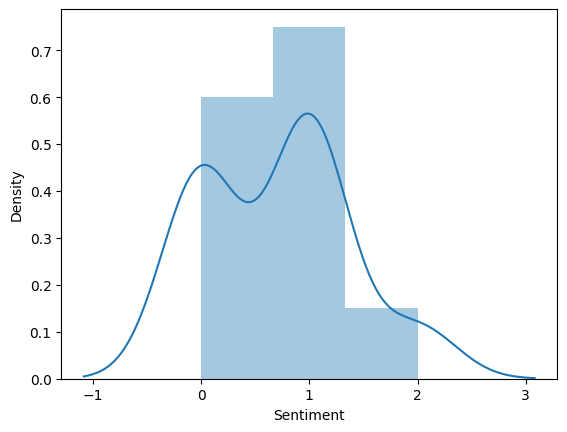

In [14]:
sns.distplot(df["Sentiment"])
sns.set(rc={"figure.figsize": (10,6)})

In [15]:
df_new = df[["Sentiment"]].value_counts()
df_new

Sentiment
1.0          10
0.0           8
2.0           2
dtype: int64

In [16]:
df_new = df.groupby(['Sentiment']).count()
df_new

,date,username,tweet,hashtags,nlikes
Sentiment,,,,,
0.0,8,8,8,8,8
1.0,10,10,10,10,10
2.0,2,2,2,2,2


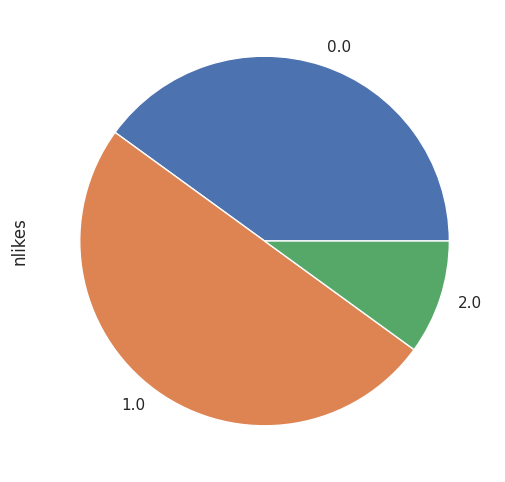

In [17]:
df_new.nlikes.plot(kind="pie")
plt.show()

*Creado por:*

*Isabel Maniega*